## This notebook focusses on a algorithm that can deal with temporal data, like: ARIMA

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [31]:
from datetime import datetime

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv("data/new_data_no_missingvalues.csv", parse_dates=['date'], date_parser=parser)

In [3]:
#dfp = df.drop(["date", "id", "unique_id", "Unnamed: 0", "total_calls", "total_sms", "average_com", "average_soc", "average_finance", "average_entertainment"], axis=1)

In [4]:
#dfp = dfp/dfp.std(0)
#dfp = minmax_scaling(dfp, columns=dfp.columns)

In [5]:
#dfp.insert(loc=0, column='date', value=df['date'])
#dfp.insert(loc=0, column='id', value=df['id'])

In [32]:
new_dfp = df[['date', 'id','average_mood']]

In [33]:
new_dfp.set_index('date', inplace=True)
#dfp.index = dfp.index.to_period('D')
#dfp.index.to_pydatetime()

In [34]:
new_dfp.index = new_dfp.index.to_period('D')

In [35]:
# dfp.to_csv("./data/final_dataset.csv")
print(new_dfp)

                 id  average_mood
date                             
2014-02-26  AS14.01          6.25
2014-03-21  AS14.01          6.25
2014-03-22  AS14.01          6.40
2014-03-23  AS14.01          6.80
2014-03-24  AS14.01          6.00
...             ...           ...
2014-05-25  AS14.33          6.25
2014-05-26  AS14.33          5.40
2014-05-27  AS14.33          6.20
2014-05-28  AS14.33          8.20
2014-05-29  AS14.33          7.00

[1215 rows x 2 columns]


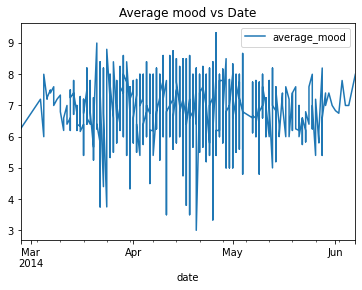

In [36]:
new_dfp = new_dfp.sort_values(by='date')

new_dfp.drop(['id'], axis=1).plot()
plt.title("Average mood vs Date")
plt.savefig('moodvsdate.png')
plt.show()

In [37]:
list_ids = new_dfp.id.unique()
list_dfs = [] 
for x in list_ids:
    window = new_dfp.loc[new_dfp['id'] == x]
    df_cor = window.drop(["id"], axis=1)
    list_dfs.append(df_cor)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


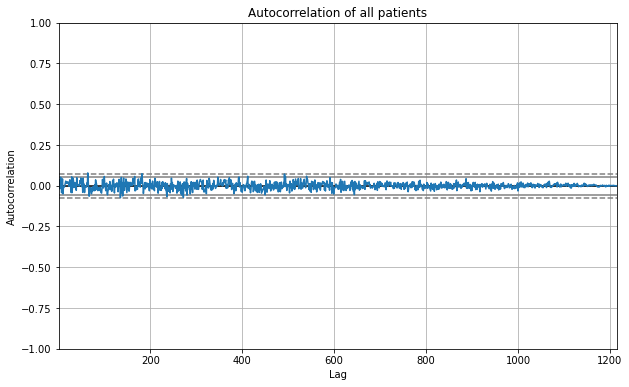

In [38]:
#for i in range(len(list_dfs)):
#    plt.figure(figsize=(10,6))
#    autocorrelation_plot(list_dfs[i])
#    plt.title(list_ids[i])
#    plt.show()

plt.figure(figsize=(10,6))
autocorrelation_plot(new_dfp.drop(['id'], axis=1))
plt.title("Autocorrelation of all patients")
plt.show()

In [40]:
model = ARIMA(new_dfp.drop(['id'], axis=1), order=(5,1,0))
#for i in range(len(list_dfs)):
#    model = ARIMA(list_dfs[i], order=(25,1,0))
#    model_fit = model.fit()
    # summary of fit model
#    print(model_fit.summary())

In [41]:
model_fit = model.fit()

In [42]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           average_mood   No. Observations:                 1215
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1415.806
Date:                Tue, 13 Apr 2021   AIC                           2843.612
Time:                        13:36:32   BIC                           2874.222
Sample:                    02-26-2014   HQIC                          2855.136
                         - 06-07-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8614      0.030    -28.445      0.000      -0.921      -0.802
ar.L2         -0.6722      0.036    -18.826      0.000      -0.742      -0.602
ar.L3         -0.5431      0.037    -14.659      0.0

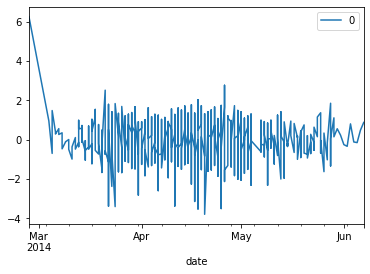

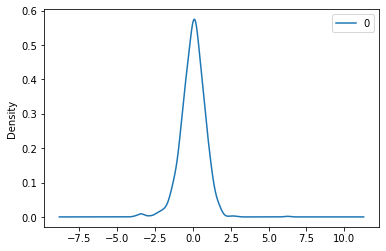

                 0
count  1215.000000
mean      0.008084
std       0.797190
min      -3.803180
25%      -0.444184
50%       0.052297
75%       0.499093
max       6.250000


In [43]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [44]:
resDiff = sm.tsa.arma_order_select_ic(new_dfp.drop(['id'], axis=1), max_ar=5, max_ma=5, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/root/venv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

In [51]:
# split into train and test sets
X = new_dfp.drop(['id'], axis=1).values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


predicted=6.971605, expected=6.200000
predicted=6.695364, expected=6.000000
predicted=6.412728, expected=6.600000
predicted=6.594994, expected=7.250000
predicted=6.999813, expected=7.200000
predicted=6.906243, expected=6.400000
predicted=6.582978, expected=6.600000
predicted=6.635250, expected=6.600000
predicted=6.799628, expected=7.400000
predicted=6.930238, expected=7.000000
predicted=6.869415, expected=7.600000
predicted=6.913041, expected=6.000000
predicted=6.871532, expected=6.333333
predicted=6.801495, expected=6.000000
predicted=6.716925, expected=5.500000
predicted=6.475104, expected=5.200000
predicted=6.046543, expected=7.600000
predicted=6.094307, expected=7.250000
predicted=6.408907, expected=8.000000
predicted=6.577395, expected=5.600000
predicted=6.456890, expected=6.200000
predicted=6.594535, expected=7.000000
predicted=6.941146, expected=7.000000
predicted=6.981454, expected=7.250000
predicted=6.772397, expected=7.600000
predicted=6.752174, expected=7.000000
predicted=7.

Test RMSE: 0.770


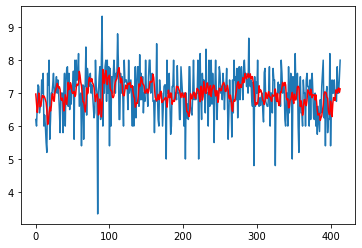

In [52]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [53]:
percentage = 0 
for x, y in zip(predictions, test): 
    difference = x - y
    if difference < 0.5 and difference > -0.5:
        print(difference, percentage)
        percentage += 1

[-0.1872721] 0
[-0.20018687] 1
[-0.01702184] 2
[0.03525007] 3
[-0.06976205] 4
[0.25688993] 5
[-0.40546511] 6
[-0.05885372] 7
[-0.26854603] 8
[-0.24782623] 9
[0.03081879] 10
[-0.09340623] 11
[-0.33404597] 12
[0.29542064] 13
[-0.17966057] 14
[0.15293485] 15
[-0.17132056] 16
[-0.21950826] 17
[-0.15071641] 18
[-0.49309891] 19
[0.11380988] 20
[-0.15968652] 21
[-0.00904736] 22
[-0.25765252] 23
[-0.12793196] 24
[-0.16440629] 25
[0.33123706] 26
[-0.01420965] 27
[-0.48348856] 28
[0.21570015] 29
[-0.02801614] 30
[-0.24293872] 31
[0.35429288] 32
[0.18866223] 33
[0.3050329] 34
[-0.28179613] 35
[-0.02561647] 36
[-0.04447397] 37
[0.29998627] 38
[-0.34234502] 39
[-0.31439786] 40
[0.44359871] 41
[-0.2982422] 42
[-0.43544559] 43
[-0.12643185] 44
[-0.37693874] 45
[0.340726] 46
[-0.19990303] 47
[-0.06437939] 48
[-0.28030814] 49
[-0.28755804] 50
[0.45308803] 51
[-0.14264118] 52
[-0.01426549] 53
[-0.22434059] 54
[-0.15759242] 55
[-0.23794371] 56
[-0.07425903] 57
[0.27225542] 58
[0.11890861] 59
[-0.22531216

In [54]:
percentage/len(predictions) *100

53.14009661835749

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d79defa5-2359-4699-82dc-d6bf5eddd7a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>